In [21]:
import numpy as np
import pandas as pd

In [22]:
import loader

In [23]:
path = "6.png"

In [24]:
x = loader.image_to_vector("./train/" + path)[0]
y = loader.image_to_vector("./cleaned/" + path)[0]

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
new_x = []
new_y = []

min_val = 0.05
max_val = 0.95

for i in range(len(y)):
    if y[i] > min_val and y[i] < max_val:
        if x[i] > min_val and x[i] < max_val:
            new_x.append(x[i])
            new_y.append(y[i])

new_x = np.asarray(new_x).reshape(-1, 1)
new_y = np.asarray(new_y)

In [27]:
from sklearn import linear_model

In [28]:
lm = linear_model.Ridge(alpha=0.1)

In [29]:
lm.fit(new_x, new_y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [30]:
values = lm.predict([[0], [1]])

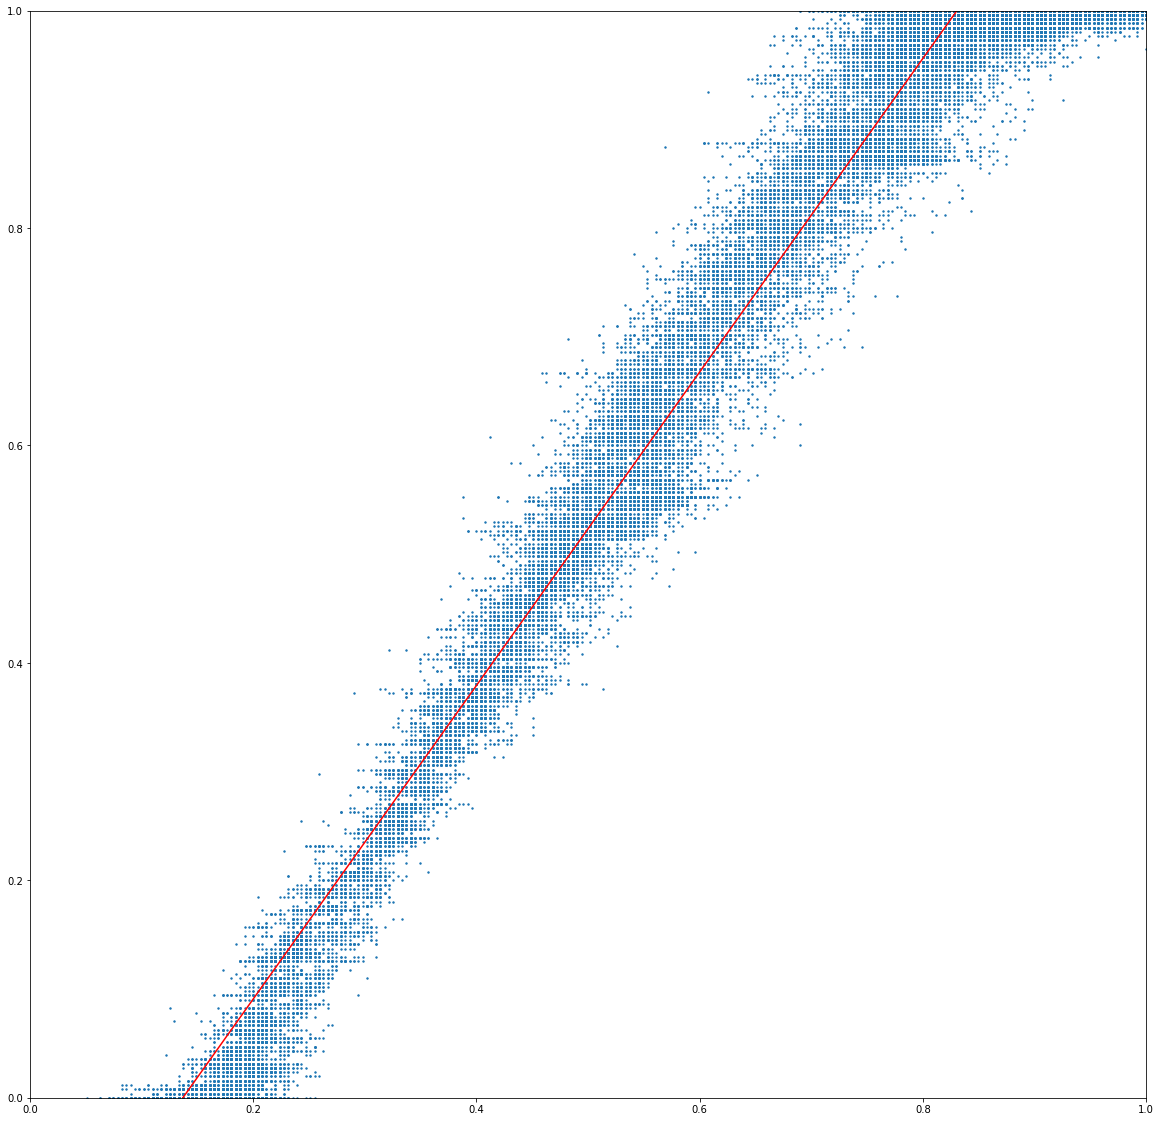

In [31]:
plt.figure(figsize=(20,20))
plt.scatter(x, y, s=2)

plt.xlim((0, 1))
plt.ylim((0, 1))

plt.plot([0, 1], values, color="red")
plt.show()

In [32]:
test_path = "184.png"

In [33]:
test_x, width, height = loader.image_to_vector("./test/" + test_path)

In [34]:
cleaned_x = lm.predict(test_x.reshape((-1, 1)))

In [35]:
def filter_output(item):
    result = item
    
    if item < 0.0:
        result = 0.0
    if item > 1.0:
        result = 1.0
        
    return result

In [36]:
cleaned_x = np.asarray(map(lambda item: filter_output(item), cleaned_x))

In [37]:
cleaned_image = cleaned_x.reshape((width, height)) * 255.0

In [39]:
loader.save_to_file("./", test_path, cleaned_image)

In [40]:
for i in [-1, 0, 1]:
    for j in [-1, 0, 1]:
        print([i,j])

[-1, -1]
[-1, 0]
[-1, 1]
[0, -1]
[0, 0]
[0, 1]
[1, -1]
[1, 0]
[1, 1]
